In [1]:
# ---------------- plotting mineral chemistry data


# --- import modules

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# from matplotlib import gridspec
import matplotlib.ticker as ticker

In [2]:
# --- create dataframe from excel spreadsheet using pandas import command 

df_analysis = pd.read_csv('./_DATA/EPMA_apfu.csv', 
                          encoding = "ANSI")

# --- fill with 0.0 data where there are no values 

df_analysis = df_analysis.fillna(0.0)

# --- add relevant sums and ratios to dataframe  

df_analysis['NbTa'] = df_analysis['Nb'] + df_analysis['Ta']
df_analysis['FeMn'] = df_analysis['Fe'] + df_analysis['Mn']
df_analysis['TiSn'] = df_analysis['Ti'] + df_analysis['Sn']
df_analysis['FeTa'] = df_analysis['Fe'] + df_analysis['Ta']
df_analysis['MnNb'] = df_analysis['Mn'] + df_analysis['Nb']
df_analysis['FeNbTa'] = df_analysis['Fe'] + df_analysis['Nb'] + df_analysis['Ta']

df_analysis['Fe/Mn'] = df_analysis['Fe'] / df_analysis['Mn']
df_analysis['Nb/Ta'] = df_analysis['Nb'] / df_analysis['Ta']
df_analysis['Ti/NbTa'] = df_analysis['Ti'] / df_analysis['NbTa']
df_analysis['Ti/FeNbTa'] = df_analysis['Ti'] / df_analysis['FeNbTa']
df_analysis['Ti/Nb'] = df_analysis['Ti'] / df_analysis['Nb']
df_analysis['Ti/Ta'] = df_analysis['Ti'] / df_analysis['Ta']
df_analysis['Ti/Sn'] = df_analysis['Ti'] / df_analysis['Sn']
df_analysis['Ta#'] = df_analysis['Ta'] / df_analysis['NbTa']
df_analysis['Mn#'] = df_analysis['Mn'] / df_analysis['FeMn']

df_analysis['FeMnNb2'] = df_analysis['FeMn'] + (2*df_analysis['Nb'])
df_analysis['FeMnTa2'] = df_analysis['FeMn'] + (2*df_analysis['Ta'])
# df_analysis['TiSn3'] = df_analysis['TiSn'] * 3



df_analysis

,Facies,Sample,Area,Comment,Mineral,Texture,Ta,Nb,Sn,Ti,...,Nb/Ta,Ti/NbTa,Ti/FeNbTa,Ti/Nb,Ti/Ta,Ti/Sn,Ta#,Mn#,FeMnNb2,FeMnTa2
0,SAPN,BU04,Ore2,BU04-Rut2.2,Rutile,rim,0.884464,0.986626,0.137358,8.845526,...,1.115507,4.727471,2.866136,8.965428,10.000997,64.397800,0.472700,0.011497,3.202514,2.998191
1,SAPN,BU04,Ore2,BU04-Rut2.3,Rutile,core,0.527495,1.071525,0.141687,9.296263,...,2.031348,5.813724,3.574355,8.675727,17.623418,65.611266,0.329886,0.003365,3.148235,2.060174
2,SAPN,BU04,Ore2,BU04-Ore2_coltan1,0.0,rim,1.145953,2.195166,0.136091,6.316732,...,1.915582,1.890604,1.344581,2.877564,5.512209,46.415440,0.342985,0.245812,6.189351,4.090924
3,PAPN,BU19TS(1),Ore1,BU19TS(1)-rutile1.3,Rutile,core,0.667969,0.130254,0.088939,10.367100,...,0.195000,12.987718,7.643243,79.591272,15.520327,116.564161,0.836820,0.033718,0.838136,1.913566
4,PAPN,BU19TS(1),Ore1,BU19TS(1)-rutile1.4,Rutile,core,0.586710,0.164315,0.087896,10.507521,...,0.280062,13.990902,8.023885,63.947263,17.909229,119.544437,0.781212,0.034855,0.907306,1.752094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Albitized,BU24,Ore4,BU24-Ore4.3,CGM,core,0.571426,7.485975,0.008277,0.097147,...,13.100513,0.012057,0.008861,0.012977,0.170008,11.736680,0.070919,0.201634,18.611806,4.782708
88,Albitized,BU24,Ore4,BU24-Ore4.4,CGM,rim,1.217390,6.894730,0.002894,0.050825,...,5.663533,0.006265,0.004749,0.007372,0.041749,17.562259,0.150071,0.280358,17.387357,6.032678
89,Albitized,BU24,Ore4,BU24-Ore4.5,CGM,core,0.745160,7.271945,0.017678,0.146145,...,9.758901,0.018229,0.013539,0.020097,0.196125,8.267091,0.092946,0.233437,18.166981,5.113411
90,Albitized,BU24,Ore4,BU24-Ore4.6,CGM,rim,1.176759,6.932291,0.004441,0.056290,...,5.891003,0.006942,0.005132,0.008120,0.047835,12.676216,0.145117,0.206509,17.469471,5.958406


In [48]:
# --- print the colums of the imported dataframe - can be changed if necessary

df_analysis.columns


Index(['Sample', 'Area', 'Comment', 'Mineral', 'Texture', 'Ta', 'Nb', 'Sn',
       'Ti', 'Al', 'Fe', 'Mn', 'Ca', 'Mg', 'Sum', 'NbTa', 'FeMn', 'TiSn',
       'FeTa', 'MnNb', 'FeNbTa', 'Fe/Mn', 'Nb/Ta', 'Ti/NbTa', 'Ti/FeNbTa',
       'Ti/Nb', 'Ti/Ta', 'Ti/Sn', 'Ta#', 'Mn#', 'FeMnNb2', 'FeMnTa2'],
      dtype='object')

In [3]:
# --- filter the dataframe to specific conditions

df_query = df_analysis.query('Sample == "BU04"').query('Area=="Ore1"')
# df_query = df_analysis.query('Mineral == "Rutile"')

df_query


,Facies,Sample,Area,Comment,Mineral,Texture,Ta,Nb,Sn,Ti,...,Nb/Ta,Ti/NbTa,Ti/FeNbTa,Ti/Nb,Ti/Ta,Ti/Sn,Ta#,Mn#,FeMnNb2,FeMnTa2
49,SAPN,BU04,Ore1,BU04-Ore1.2,CGM,patchy,0.466072,7.472722,0.008767,0.153555,...,16.033406,0.019342,0.016018,0.020549,0.329466,17.515210,0.058708,0.538076,18.512792,4.499492
50,SAPN,BU04,Ore1,BU04-Ore1.3,CGM,rim,2.022168,5.918416,0.054250,0.246380,...,2.926768,0.031028,0.024525,0.041629,0.121839,4.541556,0.254662,0.402690,15.361806,7.569309
51,SAPN,BU04,Ore1,BU04-Ore1.4,CGM,rim,1.772520,6.142570,0.053359,0.288386,...,3.465445,0.036435,0.029767,0.046949,0.162698,5.404626,0.223942,0.495575,15.799887,7.059786
52,SAPN,BU04,Ore1,BU04-Ore1.5,CGM,core,1.287844,6.602564,0.048372,0.290295,...,5.126834,0.036791,0.029673,0.043967,0.225411,6.001232,0.163216,0.467185,16.757176,6.127736
53,SAPN,BU04,Ore1,BU04-Ore1.6,CGM,core,1.135891,6.667312,0.049988,0.362492,...,5.869674,0.046454,0.037023,0.054369,0.319125,7.251505,0.145567,0.454065,16.975471,5.912629
54,SAPN,BU04,Ore1,BU04-Ore1.7,CGM,core,1.189445,6.641517,0.052916,0.374190,...,5.583712,0.047783,0.038075,0.056341,0.314592,7.071456,0.151890,0.439727,16.846752,5.942607
55,SAPN,BU04,Ore1,BU04-Ore1.8,CGM,patchy,1.264223,6.691182,0.043869,0.226340,...,5.292722,0.028451,0.023189,0.033827,0.179035,5.159460,0.158914,0.493716,16.948267,6.094350
56,SAPN,BU04,Ore1,BU04-Ore1.9,CGM,rim,1.334753,6.464730,0.080045,0.384291,...,4.843392,0.049271,0.039683,0.059444,0.287912,4.800946,0.171133,0.468990,16.478509,6.218553
57,SAPN,BU04,Ore1,BU04-Ore1.10,CGM,patchy,1.460144,6.579704,0.024125,0.128334,...,4.506203,0.015962,0.013074,0.019504,0.087891,5.319533,0.181613,0.505223,16.749795,6.510674


In [96]:
# --- plot binary scatter graphs

fig = px.scatter(df_query, x="Fe", y="Nb/Ta", color="Sample", symbol="Texture", hover_data=["Sample","Comment"],
                width=800, height=600)
#                  size="Ti",text=df_analysis["Comment"].str.slice(start=-4))


fig.update_layout(plot_bgcolor="white")
fig.update_traces(textposition='top center')

fig.update_traces(marker=dict(size=10))

fig.update_layout(font=dict(family="Arial",size=16,color="black")) 

fig.update_xaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False,mirror="allticks", range=(0.1,1.3))
fig.update_yaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False,mirror="allticks", range=(0,9))


fig.write_image("Ore_Rutile_NbTar-Fe.pdf")
fig.show()

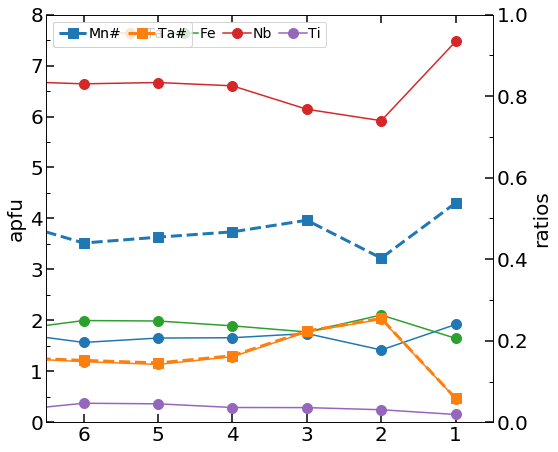

In [19]:
# --- plot binary line graphs

fig, ax = plt.subplots(figsize=(8,7.5))

    # - plot the raw spectrum line (measured data) and the modelled spectrum (after peak fitting)

s=10

plt.plot(df_query["Comment"],df_query["Mn"],'-o', label='Mn', ms=s)
plt.plot(df_query["Comment"],df_query["Ta"],'-o', label='Ta', ms=s)
plt.plot(df_query["Comment"],df_query["Fe"],'-o', label='Fe', ms=s)
plt.plot(df_query["Comment"],df_query["Nb"],'-o', label='Nb', ms=s)
plt.plot(df_query["Comment"],df_query["Ti"],'-o', label='Ti', ms=s)

plt.legend(loc='best', fontsize=14, ncol=9, handletextpad=0.1, columnspacing = 0.5)  


ax2 = ax.twinx()
ax2.plot(df_query["Comment"],df_query["Mn#"],'--s', label='Mn#',linewidth=3, ms=s)
ax2.plot(df_query["Comment"],df_query["Ta#"],'--s', label='Ta#',linewidth=3, ms=s)


plt.legend(loc='upper left', fontsize=14, ncol=9, handletextpad=0.1, columnspacing = 0.5) 


    # --- adjust plot parameters
    
plt.xlabel("Analysis",fontsize=20)
ax.set_xlim([-0.5,5.5])

ax.set_ylabel("apfu",fontsize=20)
ax.set_ylim([0,8])

ax2.set_ylabel("ratios",fontsize=20)
ax2.set_ylim([0,1])

ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_xticklabels(['1', '2','3', '4', '5', '6', '7', '8', '9'])

ax.tick_params(axis='both', which='major',labelsize=20,direction='in',width=1.5,length=8, top=True)
ax.tick_params(axis='both', which='minor',direction='in',width=1,length=4)

ax2.tick_params(axis='both', which='major',labelsize=20,direction='in',width=1.5,length=8,right=True)
ax2.tick_params(axis='both', which='minor',direction='in',width=1,length=4,right=True)


#plt.title(df_spectrum_peaks.iloc[0]["file"],horizontalalignment='center',fontsize=22)


ax.invert_xaxis()

        
plt.savefig('coltan-BU04-Ore1.pdf')
plt.show()

In [7]:
# --- normalization function - written by Bram Paredis

def normalize(data, total=None):
    """Normalize data to 100%"""
    if total is None:
        total = data.sum(axis=1)
    return data.divide(total, axis=0) * 100

In [53]:
# --- define subset within dataset for ternary normalization
A = "NbTa"
B = "TiSn"
C = "FeMn"

df_subset = df_analysis.loc[:, [A, B, C]]


# --- normalize subset using function defined above

df_subset_normalized = normalize(df_subset)


# --- combine calculated data with metadata

df_subset_normalized['Sample'] = df_analysis['Sample']
df_subset_normalized['Comment'] = df_analysis['Comment']
df_subset_normalized['Area'] = df_analysis['Area']
df_subset_normalized['Mineral'] = df_analysis['Mineral']
df_subset_normalized['Texture'] = df_analysis['Texture']

df_subset_normalized

,NbTa,TiSn,FeMn,Sample,Comment,Area,Mineral,Texture
0,15.485012,74.341703,10.173285,BU04,BU04-Rut2.2,Ore2,Rutile,rim
1,13.278524,78.374263,8.347213,BU04,BU04-Rut2.3,Ore2,Rutile,core
2,6.746373,88.371670,4.881958,BU19TS(1),BU19TS(1)-rutile1.3,Ore1,Rutile,core
3,6.297844,88.849586,4.852571,BU19TS(1),BU19TS(1)-rutile1.4,Ore1,Rutile,core
4,3.761790,92.776628,3.461583,BU19TS(1),BU19TS(1)-Rut2.1,Ore2,Rutile,core
...,...,...,...,...,...,...,...,...
87,68.267545,0.893222,30.839233,BU24,BU24-Ore4.3,Ore4,CGM,core
88,68.958706,0.456646,30.584648,BU24,BU24-Ore4.4,Ore4,CGM,rim
89,67.918439,1.387856,30.693705,BU24,BU24-Ore4.5,Ore4,CGM,core
90,68.868604,0.515774,30.615621,BU24,BU24-Ore4.6,Ore4,CGM,rim


In [54]:
# --- ternary plot of normalized subset

fig2 = px.scatter_ternary(df_subset_normalized, a=A, b=B, c=C,
                          color="Sample",hover_data=['Comment'],symbol="Texture")#,range_color=[1,5],color_continuous_scale='Inferno'))

fig2.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers'))

fig2.update_ternaries(bgcolor="white")

fig2.update_ternaries(aaxis_linecolor='black',aaxis_tickcolor='black',aaxis_ticks='inside',aaxis_showgrid=False,
                      baxis_linecolor='black',baxis_tickcolor='black',baxis_ticks='inside',baxis_showgrid=False,
                      caxis_linecolor='black',caxis_tickcolor='black',caxis_ticks='inside',caxis_showgrid=False)

# fig2.update_ternaries(aaxis_min=0,baxis_min=0.7,caxis_min=0)
fig2.update_ternaries(aaxis_min=0.6,baxis_min=0,caxis_min=0.25)

fig2.write_image("CGM_ternary_NbTa-TiSn-FeMn.pdf")
fig2.show()

# This section works for molar% data

In [6]:
# --- create dataframe from excel spreadsheet using pandas import command 

df_moles = pd.read_csv('./_DATA/EPMA_moles.csv', 
                          encoding = "ANSI")

df_moles['NbTa'] = df_moles['Nb2O5'] + df_moles['Ta2O5']
df_moles['FeMn'] = df_moles['FeO'] + df_moles['MnO']
df_moles['TiSn'] = df_moles['TiO2'] + df_moles['SnO2']


df_moles


,Facies,Sample,Area,Comment,Mineral,Texture,Ta2O5,Nb2O5,SnO2,TiO2,Al2O3,FeO,MnO,CaO,MgO,Total_mol,NbTa,FeMn,TiSn
0,SAPN,BU04,Ore2,BU04-Rut2.2,Rutile,rim,3.951993,4.408476,1.227491,79.047743,0.379038,10.858962,0.126296,0.000000,0.000000,100.0,8.360469,10.985259,80.275235
1,SAPN,BU04,Ore2,BU04-Rut2.3,Rutile,core,2.337544,4.748365,1.255745,82.391039,0.358546,8.878785,0.029975,0.000000,0.000000,100.0,7.085909,8.908760,83.646784
2,SAPN,BU04,Ore2,BU04-Ore2_coltan1,NaN,rim,5.594418,10.716565,1.328765,61.675203,3.041449,13.247483,4.317739,0.078379,0.000000,100.0,16.310983,17.565222,63.003968
3,PAPN,BU19TS(1),Ore1,BU19TS(1)-rutile1.3,Rutile,core,2.878096,0.561230,0.766428,89.337993,1.478573,4.809841,0.167840,0.000000,0.000000,100.0,3.439326,4.977681,90.104420
4,PAPN,BU19TS(1),Ore1,BU19TS(1)-rutile1.4,Rutile,core,2.512587,0.703681,0.752833,89.996981,0.972633,4.783599,0.172754,0.000000,0.104933,100.0,3.216268,4.956353,90.749814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Albitized,BU24,Ore4,BU24-Ore4.3,CGM,core,3.672511,48.111772,0.106394,1.248712,0.000000,37.352448,9.433694,0.074394,0.000075,100.0,51.784283,46.786142,1.355105
88,Albitized,BU24,Ore4,BU24-Ore4.4,CGM,rim,7.882567,44.643181,0.037477,0.658176,0.000000,33.529954,13.062611,0.185956,0.000078,100.0,52.525748,46.592565,0.695653
89,Albitized,BU24,Ore4,BU24-Ore4.5,CGM,core,4.775464,46.603284,0.226583,1.873180,0.000000,35.597771,10.840403,0.083239,0.000076,100.0,51.378749,46.438174,2.099763
90,Albitized,BU24,Ore4,BU24-Ore4.6,CGM,rim,7.620343,44.891468,0.057512,0.729036,0.000000,37.046787,9.641591,0.013185,0.000078,100.0,52.511811,46.688378,0.786548


In [13]:
# --- define subset within dataset for ternary normalization
A = "NbTa"
B = "TiSn"
C = "FeMn"

df_set = df_moles.loc[:, [A, B, C]]


# --- normalize subset using function defined above

df_set_norm = normalize(df_set)


# --- combine calculated data with metadata

df_set_norm['Facies'] = df_moles['Facies']
df_set_norm['Sample'] = df_moles['Sample']
df_set_norm['Comment'] = df_moles['Comment']
df_set_norm['Area'] = df_moles['Area']
df_set_norm['Mineral'] = df_moles['Mineral']
df_set_norm['Texture'] = df_moles['Texture']



# --- ternary plot of normalized subset

fig2 = px.scatter_ternary(df_set_norm, a=A, b=B, c=C,
                          color="Facies",hover_data=['Comment'],symbol="Texture")#,range_color=[1,5],color_continuous_scale='Inferno'))

fig2.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers'))

fig2.update_ternaries(bgcolor="white")

fig2.update_ternaries(aaxis_linecolor='black',aaxis_tickcolor='black',aaxis_ticks='inside',aaxis_showgrid=False,
                      baxis_linecolor='black',baxis_tickcolor='black',baxis_ticks='inside',baxis_showgrid=False,
                      caxis_linecolor='black',caxis_tickcolor='black',caxis_ticks='inside',caxis_showgrid=False)

# fig2.update_ternaries(aaxis_min=0,baxis_min=0.7,caxis_min=0)
# fig2.update_ternaries(aaxis_min=0.6,baxis_min=0,caxis_min=0.25)

# fig2.write_image("CGM_ternary_NbTa-TiSn-FeMn.pdf")
fig2.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df_analysis['Mn#'], df_analysis['Ta#'],'ro')


ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.set_xlabel("Mn#",family="serif",  fontsize=12)
ax1.set_ylabel("Ta#",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="in", top=True, right=True, bottom=True, length=8, labelsize=12)
ax1.tick_params(axis='both',which='minor', direction="in", top=True, right=True, bottom=True, length=4, labelsize=12)

fig.tight_layout()